In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from string import ascii_uppercase
from collections import Counter

In [4]:
!wget https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt

--2022-12-16 23:14:25--  https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273 [text/plain]
Saving to: ‘kundera.txt’

kundera.txt         100%[===================>]     273  --.-KB/s    in 0s      

2022-12-16 23:14:25 (35.8 MB/s) - ‘kundera.txt’ saved [273/273]



In [7]:
!cat kundera.txt

Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.

Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.


In [9]:
file = open("kundera.txt")
texto = file.read()
file.close()
texto


'Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.'

In [11]:
words = texto.split()
words[:5]

['Chance', 'and', 'chance', 'alone', 'has']

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
table = str.maketrans('', '', string.punctuation)
words[8]

'us.'

In [15]:
words[8].translate(table)

'us'

In [18]:
# remove punctuation
stripped = [w.translate(table) for w in words]
words_min = [word.lower() for word in stripped]
words_min

['chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'everything',
 'that',
 'occurs',
 'out',
 'of',
 'necessity',
 'everything',
 'expected',
 'repeated',
 'day',
 'in',
 'and',
 'day',
 'out',
 'is',
 'mute',
 'only',
 'chance',
 'can',
 'speak',
 'to',
 'us',
 'we',
 'read',
 'its',
 'message',
 'much',
 'as',
 'gypsies',
 'read',
 'the',
 'images',
 'made',
 'by',
 'coffee',
 'grounds',
 'at',
 'the',
 'bottom',
 'of',
 'a',
 'cup']

<BarContainer object of 39 artists>

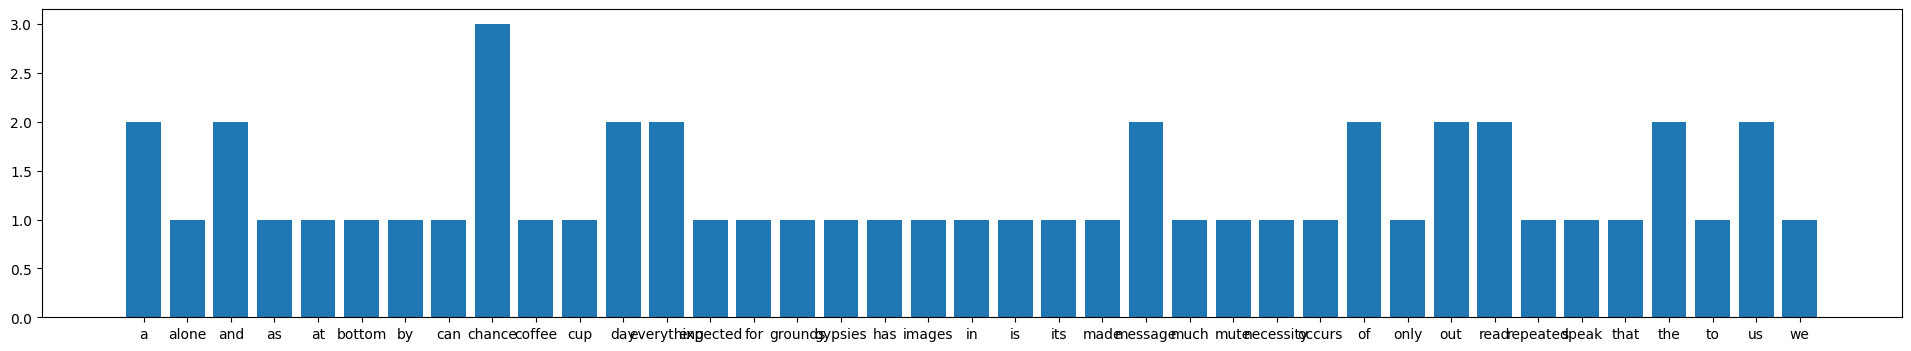

In [23]:
# Our states
words_names = np.unique(words_min)
plt.figure(figsize=(24,4))
plt.bar(*np.unique(words_min, return_counts=True))

In [43]:
# Our states (words)
words_names = np.unique(words_min)
# number of states (words)
p_unicas = len(words_names)

data = np.zeros((p_unicas, p_unicas))
df = pd.DataFrame(data, columns=words_names, 
    index=words_names)
df

,a,alone,and,as,at,bottom,by,can,chance,coffee,...,only,out,read,repeated,speak,that,the,to,us,we
a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
at,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bottom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
by,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
can,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coffee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
for i in range(1, len(words_min)):
    col = words_min[i]
    row = words_min[i-1]
    df[col][row] += 1
df


,a,alone,and,as,at,bottom,by,can,chance,coffee,...,only,out,read,repeated,speak,that,the,to,us,we
a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
at,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
bottom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
by,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
can,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
chance,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coffee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

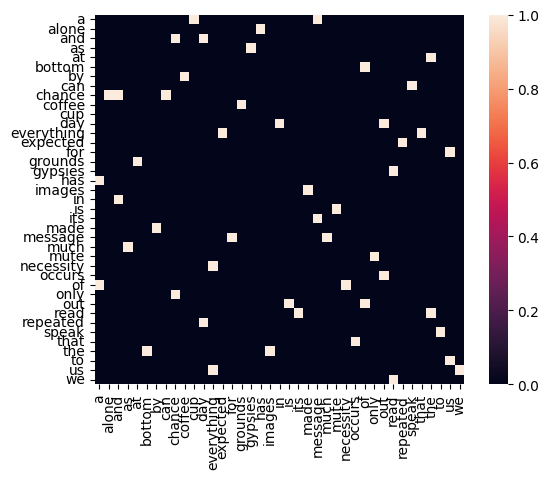

In [45]:
import seaborn as sns
sns.heatmap(df, cbar=True, square=True, annot=False,
    xticklabels=words_names, yticklabels=words_names)

<AxesSubplot:>

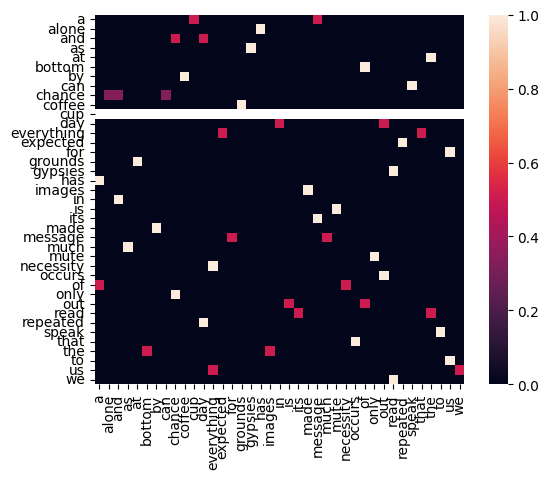

In [46]:
df.loc[:,:] = df.loc[:,:].div(df.sum(axis=1), axis=0)
sns.heatmap(df, cbar=True, square=True, annot=False,
    xticklabels=words_names, yticklabels=words_names)

In [47]:
df.sum(axis=1)

a             1.0
alone         1.0
and           1.0
as            1.0
at            1.0
bottom        1.0
by            1.0
can           1.0
chance        1.0
coffee        1.0
cup           0.0
day           1.0
everything    1.0
expected      1.0
for           1.0
grounds       1.0
gypsies       1.0
has           1.0
images        1.0
in            1.0
is            1.0
its           1.0
made          1.0
message       1.0
much          1.0
mute          1.0
necessity     1.0
occurs        1.0
of            1.0
only          1.0
out           1.0
read          1.0
repeated      1.0
speak         1.0
that          1.0
the           1.0
to            1.0
us            1.0
we            1.0
dtype: float64

<AxesSubplot:>

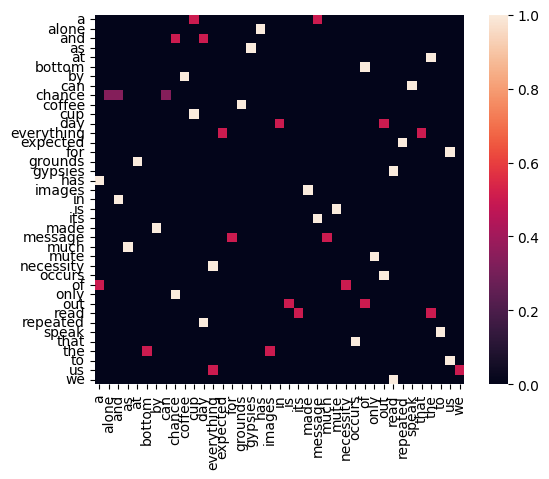

In [51]:
df.loc['cup'] = 0
df['cup']['cup'] = 1
sns.heatmap(df, cbar=True, square=True, annot=False,
    xticklabels=words_names, yticklabels=words_names)

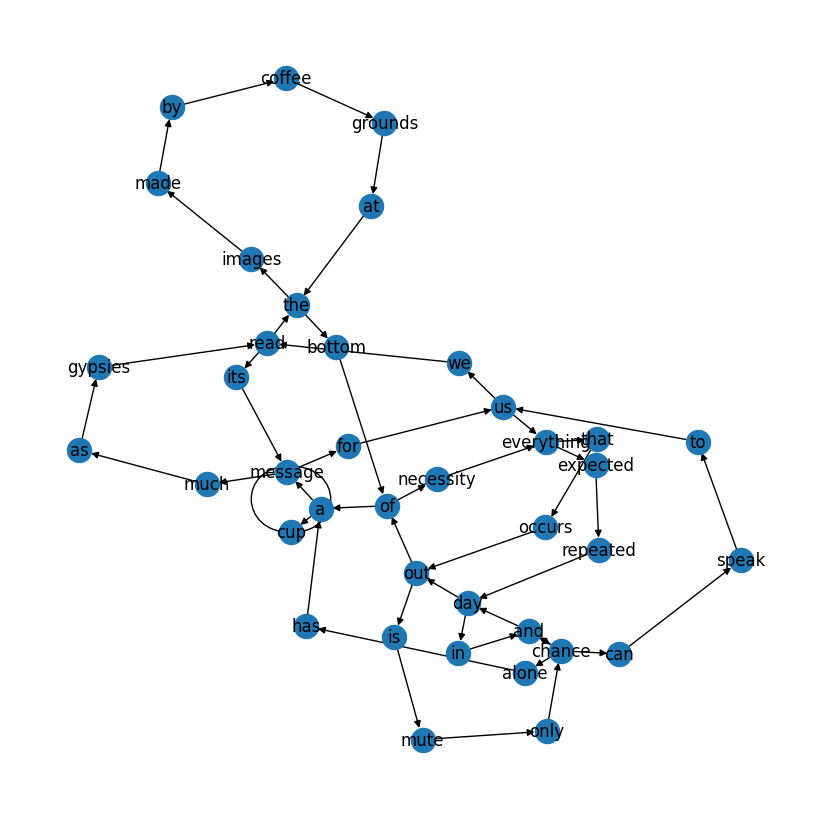

In [58]:
import networkx as nx
G = nx.from_numpy_matrix(df.values, create_using=nx.DiGraph())
label_mapping = {idx: val for idx, val in enumerate(df.columns)}
G = nx.relabel_nodes(G, label_mapping)
plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(G, with_labels=True)

In [66]:
def rw_graph(start, steps, states, df):
    walk = [start]
    for si in range(steps):
        p = df.loc[walk[-1], :]
        walk += [np.random.choice(states, p=p)]
        if walk[-1] == walk[-2]: break
    return walk[:-1]

for i in range(100):
    w = ' '.join(rw_graph('chance', 8, words_names, df))
    print(w)

chance can speak to us everything expected repeated
chance and chance alone has a cup
chance can speak to us everything that occurs
chance alone has a message much as gypsies
chance can speak to us we read the
chance can speak to us we read its
chance alone has a message much as gypsies
chance can speak to us everything expected repeated
chance alone has a message for us we
chance and chance can speak to us everything
chance alone has a message for us everything
chance can speak to us we read the
chance can speak to us everything that occurs
chance can speak to us everything expected repeated
chance and day out of a message much
chance alone has a message much as gypsies
chance can speak to us everything that occurs
chance alone has a cup
chance and day in and day in and
chance can speak to us everything that occurs
chance alone has a message much as gypsies
chance and chance and chance can speak to
chance alone has a cup
chance and day out is mute only chance
chance alone has a messag

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>